In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import StratifiedKFold
from sklearn import ensemble
import xgboost as xgb
from sklearn.metrics import mean_squared_error 

**Import Dataset**

In [2]:
df =pd.read_csv ('/home/jovyan/Onlineshoppersdata(1).csv')

# <font color='red'>**Classification Algortihms with imbalanced dataset**</font>

## **Random Forest**

### **Separate the data into Train and Test**

In [3]:
x = df.drop(['Revenue'],axis=1).values   # independant features
y = df['Revenue'].values					# dependant variable

x_trainrf, x_testrf, y_trainrf, y_testrf = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
forest  = RandomForestClassifier()
 
forest.fit(x_trainrf,y_trainrf)

y_predrf =forest.predict(x_testrf)

In [5]:
accuracy_forest = (metrics.accuracy_score(y_testrf,y_predrf)*100)
print('Acurracy is ', str(round(accuracy_forest,2)))

Acurracy is  89.05


In [6]:
rmse = np.sqrt(mean_squared_error(y_testrf, y_predrf))
print("RMSE (root-mean-square error): %f" % (rmse))

RMSE (root-mean-square error): 0.330891


In [7]:
# View confusion matrix for test data and predictions
matrix_rf = confusion_matrix(y_testrf, y_predrf)
print(matrix_rf )

[[1974   81]
 [ 189  222]]


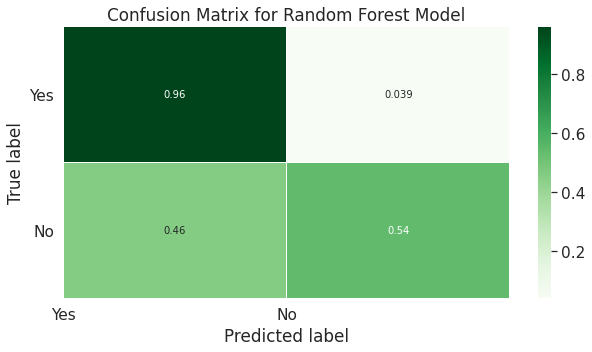

In [8]:
# Get and reshape confusion matrix data

matrix_rforest = matrix_rf.astype('float') / matrix_rf.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix_rforest, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Yes', 'No']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0,)
plt.yticks(tick_marks2, class_names, rotation=0,  )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig('output14.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# View the classification report for test data and predictions
print(classification_report(y_testrf, y_predrf))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.73      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



## **K-Fold Cross Validation for Random Forest**

> **Using Cross Validate**

In [10]:
x = df.drop(['Revenue'],axis=1).values   # independant features
y = df['Revenue'].values					# dependant variable

model = RandomForestClassifier(random_state=42)
cv = cross_validate(model, x, y, cv=10)
test_score =(cv['test_score'])*100
print('The test scores are:, ' + str(test_score))
print('The average test score is :' + str(test_score.mean()))


The test scores are:, [88.24006488 90.51094891 93.18734793 88.40227088 89.6188159  87.10462287
 87.34793187 88.80778589 89.21330089 86.13138686]
The average test score is :88.85644768856449


In [11]:
scores = cross_val_score(model, x, y, cv=10)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.02


> **Using Kfold to separate the data**

In [12]:
X = df.drop(['Revenue'],axis=1).values   # independant features
y = df['Revenue'].values					# dependant variable

kf = KFold(n_splits=10,random_state=42,shuffle=True)
kf.get_n_splits(X)
i=1
print("confusion matrix:")
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]

    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)

    print (i,"\n",confusion_matrix(y_test, model.predict(X_test)))
    i=i+1
    print(10* '#')

confusion matrix:
1 
 [[987  43]
 [ 95 108]]
##########
2 
 [[989  36]
 [ 91 117]]
##########
3 
 [[1029   40]
 [  67   97]]
##########
4 
 [[1007   39]
 [  79  108]]
##########
5 
 [[1013   39]
 [  76  105]]
##########
6 
 [[1011   28]
 [  75  119]]
##########
7 
 [[1010   37]
 [  79  107]]
##########
8 
 [[984  46]
 [ 89 114]]
##########
9 
 [[1007   28]
 [  72  126]]
##########
10 
 [[1012   37]
 [  92   92]]
##########


> **Using StratifiedKFold**

In [13]:
X = df.drop(['Revenue'],axis=1).values   # independant features
y = df['Revenue'].values					# dependant variable

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Fold:1, Train set: 11097, Test set:1233
Fold:2, Train set: 11097, Test set:1233
Fold:3, Train set: 11097, Test set:1233
Fold:4, Train set: 11097, Test set:1233
Fold:5, Train set: 11097, Test set:1233
Fold:6, Train set: 11097, Test set:1233
Fold:7, Train set: 11097, Test set:1233
Fold:8, Train set: 11097, Test set:1233
Fold:9, Train set: 11097, Test set:1233
Fold:10, Train set: 11097, Test set:1233
Scores for each fold are: [0.90186537 0.9026764  0.90024331 0.89699919 0.90510949 0.90348743
 0.9026764  0.9107867  0.89213301 0.9026764 ]
Average score: 0.90


> <font color='blue'>**After applying K-fold to Random Forest we can observe that the average score remains at 90%**</font>

## **XGBoost**

In [14]:
x = df.drop(['Revenue'],axis=1).values   # independant features
y = df['Revenue'].values					# dependant variable

data_dmatrix = xgb.DMatrix(data=x,label=y)
X_trainxg, X_testxg, y_trainxg, y_testxg = train_test_split(x, y, test_size=0.2, random_state=42)

xg_model = xgb.XGBClassifier()
print(xg_model)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)


In [15]:
xg_model.fit(X_trainxg,y_trainxg)

preds_xg = xg_model.predict(X_testxg)# make predictions for test data

predictions = [round(value) for value in preds_xg]


[22:30:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [16]:
accuracy_xg = (metrics.accuracy_score(y_testxg,preds_xg)*100)
print('Acurracy is ', str(round(accuracy_forest,2)))

Acurracy is  89.05


In [17]:
rmse = np.sqrt(mean_squared_error(y_testxg, preds_xg))
print("RMSE (root-mean-square error): %f" % (rmse))

RMSE (root-mean-square error): 0.338165


In [24]:
# View confusion matrix for test data and predictions
matrix_xgboost=confusion_matrix(y_testxg, preds_xg)
print(matrix_xgboost)

[[1958   97]
 [ 185  226]]


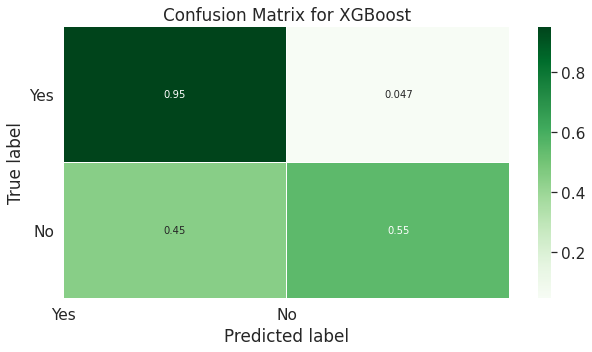

In [25]:
# Get and reshape confusion matrix data
matrix_xg = matrix_xgboost.astype('float') / matrix_xgboost.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix_xg, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Yes', 'No']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0,)
plt.yticks(tick_marks2, class_names, rotation=0,  )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost')
plt.savefig('output15.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
print(classification_report(y_testxg, preds_xg))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2055
           1       0.70      0.55      0.62       411

    accuracy                           0.89      2466
   macro avg       0.81      0.75      0.77      2466
weighted avg       0.88      0.89      0.88      2466



## **XGBoost Model With k-Fold Cross Validation**

> **Using Kfold**

In [33]:
x = df.drop(['Revenue'],axis=1).values   # independant features
y = df['Revenue'].values					# dependant variable

# CV model
model = xgb.XGBClassifier(use_label_encoder=False,eval_metric='mlogloss' )
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 89.70% (0.87%)


> **Using stratified cross validation**

In [36]:
X = df.drop(['Revenue'],axis=1).values   # independant features
Y = df['Revenue'].values					# dependant variable

# CV model
model = xgb.XGBClassifier(use_label_encoder=False,eval_metric='mlogloss' )
kfold = StratifiedKFold(n_splits=10, random_state=7,shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print("The Accuracy is: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

The Accuracy is: 89.75% (0.56%)


> <font color='blue'>**After applying K-fold to the XGBoost model we can observe that the average score remains at 88-89%**</font>